# S08 T01: Feature Engineering
Aprende a manejar parámetros con Python.
___

In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats

In [2]:
#import the dataset
nba_dataset = pd.read_csv('games_details.csv')
nba_dataset.head()

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [3]:
nba_dataset.info() #basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626111 entries, 0 to 626110
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            626111 non-null  int64  
 1   TEAM_ID            626111 non-null  int64  
 2   TEAM_ABBREVIATION  626111 non-null  object 
 3   TEAM_CITY          626111 non-null  object 
 4   PLAYER_ID          626111 non-null  int64  
 5   PLAYER_NAME        626111 non-null  object 
 6   NICKNAME           10485 non-null   object 
 7   START_POSITION     239375 non-null  object 
 8   COMMENT            102359 non-null  object 
 9   MIN                523751 non-null  object 
 10  FGM                523751 non-null  float64
 11  FGA                523751 non-null  float64
 12  FG_PCT             523751 non-null  float64
 13  FG3M               523751 non-null  float64
 14  FG3A               523751 non-null  float64
 15  FG3_PCT            523751 non-null  float64
 16  FT

In [4]:
nba_dataset.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
NICKNAME              object
START_POSITION        object
COMMENT               object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

In [5]:
nba_dataset.isnull().sum() #search for null values

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615626
START_POSITION       386736
COMMENT              523752
MIN                  102360
FGM                  102360
FGA                  102360
FG_PCT               102360
FG3M                 102360
FG3A                 102360
FG3_PCT              102360
FTM                  102360
FTA                  102360
FT_PCT               102360
OREB                 102360
DREB                 102360
REB                  102360
AST                  102360
STL                  102360
BLK                  102360
TO                   102360
PF                   102360
PTS                  102360
PLUS_MINUS           126021
dtype: int64

In [6]:
round(nba_dataset[:].isnull().sum() * 100 / nba_dataset.shape[0], 2)

GAME_ID               0.00
TEAM_ID               0.00
TEAM_ABBREVIATION     0.00
TEAM_CITY             0.00
PLAYER_ID             0.00
PLAYER_NAME           0.00
NICKNAME             98.33
START_POSITION       61.77
COMMENT              83.65
MIN                  16.35
FGM                  16.35
FGA                  16.35
FG_PCT               16.35
FG3M                 16.35
FG3A                 16.35
FG3_PCT              16.35
FTM                  16.35
FTA                  16.35
FT_PCT               16.35
OREB                 16.35
DREB                 16.35
REB                  16.35
AST                  16.35
STL                  16.35
BLK                  16.35
TO                   16.35
PF                   16.35
PTS                  16.35
PLUS_MINUS           20.13
dtype: float64

Se remueven los atributos tienen un porcentaje de faltantes grande, como "COMMENT", "NICKNAME", "START_POSICTION" y los atributos que dan informacion repetida, como 'TEAM_ABBREVIATION','PLAYER_ID', 'TEAM_ID'

In [7]:
def str_to_number(time_str): #function to change the type of data
    if not isinstance(time_str, str):
        return 0
    minutes, *_ = [int(x) for x in time_str.split(':')]
    return minutes
nba_dataset.MIN = nba_dataset.MIN.apply(str_to_number)

In [8]:
nba_dataset.drop(columns=['COMMENT', 'NICKNAME', 'START_POSITION','TEAM_ABBREVIATION','PLAYER_ID','TEAM_ID'], inplace=True)


In [9]:
#clean the dataset and null values
nba_cleandata = nba_dataset.copy()
nba_cleandata.update(nba_dataset.fillna(0))

In [10]:
nba_cleandata.MIN = nba_cleandata.MIN.astype('float64')

In [11]:
nba_cleandata.describe().round(2)

,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,...,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00
mean,21645530.61,18.79,2.99,6.59,0.35,0.63,1.77,0.17,1.45,1.92,...,0.86,2.53,3.39,1.75,0.60,0.39,1.11,1.68,8.06,-0.00
std,5656109.87,13.23,3.06,5.94,0.28,1.14,2.44,0.27,2.25,2.78,...,1.34,2.70,3.52,2.39,0.93,0.81,1.37,1.56,8.17,9.48
min,10300001.00,-9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-57.00
25%,20600922.00,6.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00
50%,21200224.00,20.00,2.00,6.00,0.38,0.00,1.00,0.00,0.00,0.00,...,0.00,2.00,3.00,1.00,0.00,0.00,1.00,1.00,6.00,0.00
75%,21700202.00,30.00,5.00,10.00,0.52,1.00,3.00,0.33,2.00,3.00,...,1.00,4.00,5.00,3.00,1.00,1.00,2.00,3.00,13.00,4.00
max,52000211.00,96.00,28.00,50.00,1.00,14.00,24.00,1.00,26.00,39.00,...,18.00,25.00,31.00,25.00,10.00,12.00,12.00,15.00,81.00,57.00


In [12]:
nba_cleandata.shape

(626111, 23)

## Nivel 1
- Ejercicio 1: <br>
> 1.1 Coge un conjunto de datos de tema deportivo que te guste y normaliza los atributos categóricos en dummy. 

___


Se seleccionan las variables categoricas del dataset y se transforman estas variables a variables numericas en una serie de 1 y 0, que facilita la cuantificacion de un atributo y su comparacion.

>Las variables categoricas que tenemos en el dataset son: TEAM_CITY y PLAYER_NAME. Por lo que se crean las dummy variables para ellos.

In [13]:
dummy = pd.get_dummies(nba_cleandata, columns=['TEAM_CITY', 'PLAYER_NAME'])
dummy.head()


,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,PLAYER_NAME_Zeljko Rebraca,PLAYER_NAME_Zendon Hamilton,PLAYER_NAME_Zhaire Smith,PLAYER_NAME_Zhou Qi,PLAYER_NAME_Ziaire Williams,PLAYER_NAME_Zion Williamson,PLAYER_NAME_Zoran Dragic,PLAYER_NAME_Zoran Planinic,PLAYER_NAME_Zydrunas Ilgauskas,PLAYER_NAME_Zylan Cheatham
0,22100213,27.0,1.0,6.0,0.167,0.0,5.0,0.000,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,22100213,30.0,2.0,12.0,0.167,1.0,8.0,0.125,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,22100213,24.0,9.0,12.0,0.750,0.0,0.0,0.000,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,22100213,35.0,9.0,20.0,0.450,5.0,11.0,0.455,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,22100213,28.0,0.0,5.0,0.000,0.0,4.0,0.000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626111 entries, 0 to 626110
Columns: 2589 entries, GAME_ID to PLAYER_NAME_Zylan Cheatham
dtypes: float64(20), int64(1), uint8(2568)
memory usage: 1.6 GB


Se puede observar que se ha pasado de tener 23 columnas a 2589 por las variables dummy creadas. 

> 1.2 Estandariza los atributos numéricos con StandardScaler.

Se aplica el metodo de normalizacion de atributos "Standard scaling", la cual es una tecnica que asume que los datos no siguen una distribucion normal y los re-escala considerando la desviacion estandard de los datos.

In [15]:
#import standardscaler
from sklearn.preprocessing import StandardScaler

In [16]:
nba_stand=dummy.copy()

In [17]:
#we group the numeric columns to standarized them
features = []

for column in nba_stand:
    if nba_stand[column].dtype == 'float64': 
        features.append(column)

nba_stand[features]


,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,27.0,1.0,6.0,0.167,0.0,5.0,0.000,1.0,1.0,1.000,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,30.0,2.0,12.0,0.167,1.0,8.0,0.125,0.0,0.0,0.000,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,24.0,9.0,12.0,0.750,0.0,0.0,0.000,2.0,5.0,0.400,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,35.0,9.0,20.0,0.450,5.0,11.0,0.455,1.0,1.0,1.000,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,28.0,0.0,5.0,0.000,0.0,4.0,0.000,0.0,0.0,0.000,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626106,19.0,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,0.0
626107,23.0,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,0.0
626108,15.0,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,0.0
626109,19.0,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,0.0


In [18]:
#apply the standarization to numeric features
nba_stand[features] = pd.DataFrame(StandardScaler().fit_transform(nba_stand[features].values))
nba_stand


,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,PLAYER_NAME_Zeljko Rebraca,PLAYER_NAME_Zendon Hamilton,PLAYER_NAME_Zhaire Smith,PLAYER_NAME_Zhou Qi,PLAYER_NAME_Ziaire Williams,PLAYER_NAME_Zion Williamson,PLAYER_NAME_Zoran Dragic,PLAYER_NAME_Zoran Planinic,PLAYER_NAME_Zydrunas Ilgauskas,PLAYER_NAME_Zylan Cheatham
0,22100213,0.620337,-0.650067,-0.099371,-0.653395,-0.553877,1.326592,-0.601689,-0.202077,-0.331024,...,0,0,0,0,0,0,0,0,0,0
1,22100213,0.847136,-0.323420,0.910989,-0.653395,0.325380,2.558436,-0.146280,-0.646729,-0.691002,...,0,0,0,0,0,0,0,0,0,0
2,22100213,0.393537,1.963109,0.910989,1.452831,-0.553877,-0.726481,-0.601689,0.242575,1.108887,...,0,0,0,0,0,0,0,0,0,0
3,22100213,1.225135,1.963109,2.258137,0.369009,3.842407,3.790279,1.056000,-0.202077,-0.331024,...,0,0,0,0,0,0,0,0,0,0
4,22100213,0.695937,-0.976714,-0.267765,-1.256723,-0.553877,0.915977,-0.601689,-0.646729,-0.691002,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626106,11200005,0.015538,0.329874,0.405809,0.347333,2.083893,1.737206,1.219947,2.021183,1.828843,...,0,0,0,0,0,0,0,0,0,0
626107,11200005,0.317938,1.309815,0.742596,1.040979,-0.553877,-0.726481,-0.601689,1.131879,0.748909,...,0,0,0,0,0,0,0,0,0,0
626108,11200005,-0.286861,0.003227,0.069022,0.293142,-0.553877,-0.726481,-0.601689,-0.646729,-0.691002,...,0,0,0,0,0,0,0,0,0,0
626109,11200005,0.015538,-0.650067,-0.941338,2.356015,-0.553877,-0.726481,-0.601689,-0.646729,0.028954,...,0,0,0,0,0,0,0,0,0,0


Ahora se puede observar como la estandarizacion de los atributos influye en la distribucion de las variables. 

<AxesSubplot:title={'center':'Standardized features'}, ylabel='Count'>

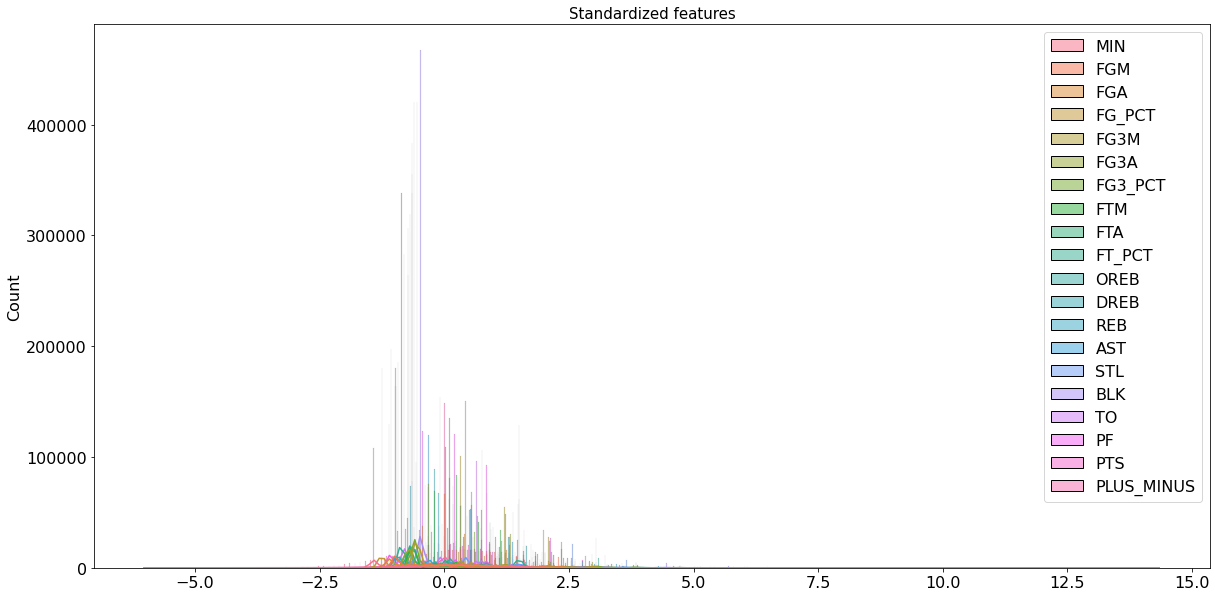

In [36]:
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = '16'
plt.title('Standardized features', fontsize = 15)     
sns.histplot(nba_stand[features], kde =True)

## Nivel 2
- Ejercicio 2: <br>
> Continúa con el conjunto de datos de tema deportivo que te guste y aplica el análisis de componentes principales (PCA).

In [19]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(.95) #95% of the variance is retained
principalComponents = pca.fit_transform(nba_stand.loc[:,'MIN':'PLUS_MINUS']) #std features
principalDF = pd.DataFrame(data=principalComponents)

**Explained variance** 
<br>

Indica cuanta informacion (variance) se puede atribuir a cada uno de los componentes principales. Lo cual es importante, pues al cambiar las dimensiones espaciales se puede perder informacion relativa a la variance.

In [26]:
pca.explained_variance_ratio_.round(2)

array([0.43, 0.12, 0.07, 0.05, 0.05, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03,
       0.02, 0.02])

In [27]:
pca.explained_variance_ratio_.sum().round(2)

0.97

Se ha inicializado el calculo de "Principal component analysys" especificando que se quiere retener el 95% de la varianza de los datos. Sin embargo, al analizar la explained variance de los PCA generados, se observa que para lograr un porcentaje mayor al requerido se requieren de 13 PCA, por lo que no estamos reduciendo las dimensiones espaciales para el procesamiento de los datos lo suficiente. 
___
Por lo que siguiendo la convencionalidad observada en la documentacion, se decidio generar un PCA de 2 componentes. 

In [21]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(nba_stand.loc[:,'MIN':'PLUS_MINUS'])
principalDF = pd.DataFrame(data=principalComponents, columns=['PCA1', 'PCA2'])

In [22]:
df_final = pd.concat([principalDF, nba_cleandata[['PLAYER_NAME','TEAM_CITY']]],axis=1)
df_final

,PCA1,PCA2,PLAYER_NAME,TEAM_CITY
0,0.155952,-0.326767,Kentavious Caldwell-Pope,Washington
1,0.687598,0.500874,Kyle Kuzma,Washington
2,3.228101,-2.263687,Daniel Gafford,Washington
3,4.985641,4.670753,Bradley Beal,Washington
4,-1.471615,0.228213,Spencer Dinwiddie,Washington
...,...,...,...,...
626106,2.705789,2.250066,Jordan Hamilton,Denver
626107,1.818297,-0.403384,Kenneth Faried,Denver
626108,-0.290949,-1.907116,Kosta Koufos,Denver
626109,-0.721490,-0.814702,Timofey Mozgov,Denver


In [24]:
pca.explained_variance_ratio_.round(2)

array([0.43, 0.12])

In [23]:
pca.explained_variance_ratio_.sum().round(2)

0.55

Se observa que al solo utilizar dos PCA, la explained variance que se retiene es del 55%, donde el primer PCA contiene el 43% de la varianza y el segundo el 12%. Se observa que al reducir de 13 a 2 PCA, se pierde el 42% de la varianza, aunque los 11 PCA restantes contienen cada uno porcentajes muy bajos.

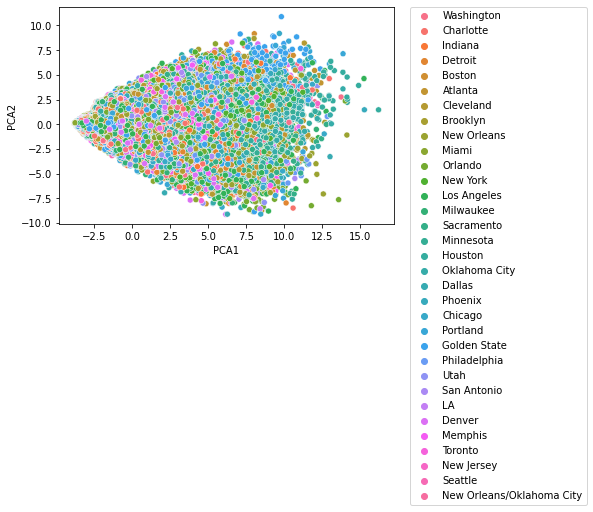

In [30]:
fig_pca = sns.scatterplot(data=df_final, x="PCA1", y="PCA2", hue='TEAM_CITY')
fig_pca.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)

## Nivel 3
- Ejercicio 3: <br>
> Continúa con el conjunto de datos de tema deportivo que te guste y normaliza los datos teniendo en cuenta a los outliers.
___
Para poder normalizar los datos incluyendo los valores atipicos (outliers) primero observamos la descripcion de los datos (max-minimos- media):

In [37]:
# Description of all our variables
round(nba_cleandata.describe(include = 'all'),2)

,GAME_ID,TEAM_CITY,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,626111.00,626111,626111,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,...,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00,626111.00
unique,NaN,33,2535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Los Angeles,LeBron James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,35326,1714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,21645530.61,NaN,NaN,18.79,2.99,6.59,0.35,0.63,1.77,0.17,...,0.86,2.53,3.39,1.75,0.60,0.39,1.11,1.68,8.06,-0.00
std,5656109.87,NaN,NaN,13.23,3.06,5.94,0.28,1.14,2.44,0.27,...,1.34,2.70,3.52,2.39,0.93,0.81,1.37,1.56,8.17,9.48
min,10300001.00,NaN,NaN,-9.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-57.00
25%,20600922.00,NaN,NaN,6.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00
50%,21200224.00,NaN,NaN,20.00,2.00,6.00,0.38,0.00,1.00,0.00,...,0.00,2.00,3.00,1.00,0.00,0.00,1.00,1.00,6.00,0.00
75%,21700202.00,NaN,NaN,30.00,5.00,10.00,0.52,1.00,3.00,0.33,...,1.00,4.00,5.00,3.00,1.00,1.00,2.00,3.00,13.00,4.00


Se puede observar que en varias de las variables numericas tenemos diferencias considerables entre el minimo, maximo y la media de los datos, por lo que ahora hacemos un data visualization para identificar mejor los valores atipicos.

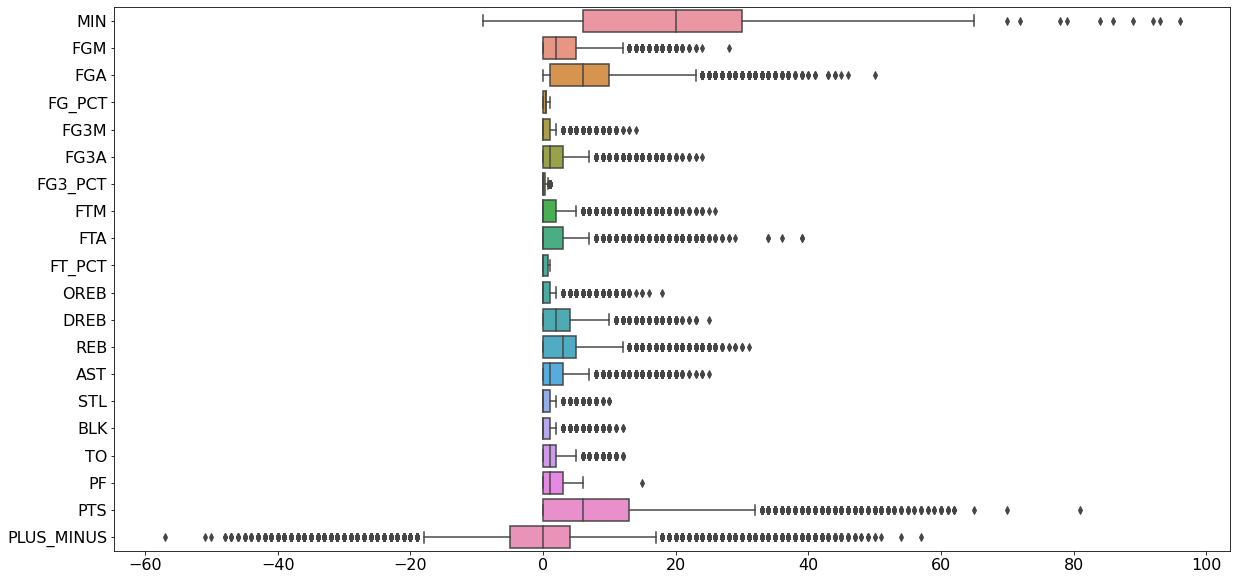

In [42]:
plt.figure(figsize=(20,10))
bxplot = sns.boxplot(data=nba_cleandata[features], orient="h")


Ahora que se han observado los valores atipicos, se puede inferir en las razones de la existencia de estos valores fuera de escala, pero siendo datos relativos al desempeño de los jugadores en los partidos se puede suponer que los valores atipicos no son producto de errores en el data collection. Y, en cambio, son valores atipicos naturales por lo que se deberian conservar en el analisis.
<br>

Por lo que, para normalizar manteniendo los valores atipicos pero reduciendo su influencia, se va a utilizar "Robust data scalling" or robust "standardization"
<br>

*https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/* <br>
*https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/*  <br>
*https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/* <br>
*https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02*

In [45]:
# Robust Scaler
from sklearn.preprocessing import RobustScaler
nba_RobustScaler = pd.DataFrame(RobustScaler().fit_transform(nba_cleandata[features]))
nba_RobustScaler.columns = features
nba_RobustScaler.head()

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0.291667,-0.2,0.000000,-0.398467,0.0,1.333333,0.000000,0.5,0.333333,1.25,1.0,0.75,0.6,0.333333,1.0,0.0,0.0,-0.333333,-0.230769,0.222222
1,0.416667,0.0,0.666667,-0.398467,1.0,2.333333,0.375375,0.0,0.000000,0.00,1.0,0.50,0.4,0.666667,1.0,2.0,0.0,0.000000,-0.076923,-1.555556
2,0.166667,1.4,0.666667,0.718391,0.0,-0.333333,0.000000,1.0,1.666667,0.50,2.0,1.25,1.2,0.000000,2.0,1.0,0.0,1.000000,1.076923,-0.222222
3,0.625000,1.4,1.555556,0.143678,5.0,3.333333,1.366366,0.5,0.333333,1.25,0.0,0.25,0.0,2.000000,2.0,0.0,0.5,0.666667,1.384615,-1.000000
4,0.333333,-0.4,-0.111111,-0.718391,0.0,1.000000,0.000000,0.0,0.000000,0.00,0.0,0.25,0.0,0.333333,0.0,0.0,0.5,0.000000,-0.461538,-0.555556


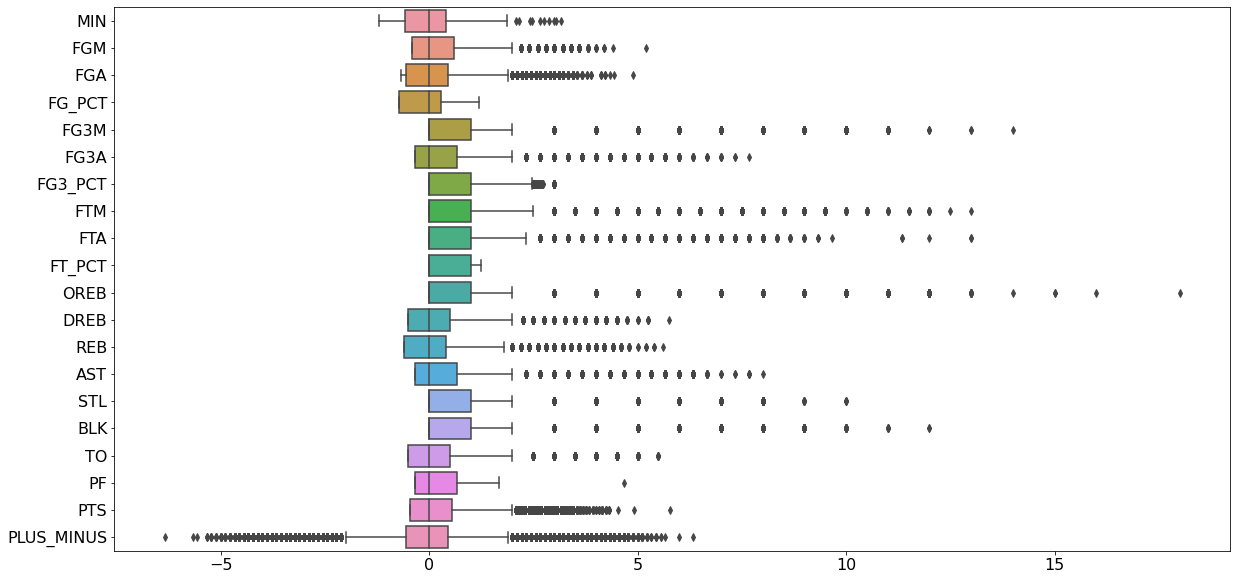

In [46]:
plt.figure(figsize=(20,10))
bxplot = sns.boxplot(data=nba_RobustScaler[features], orient="h")

<AxesSubplot:title={'center':'Standardized features'}, ylabel='Count'>

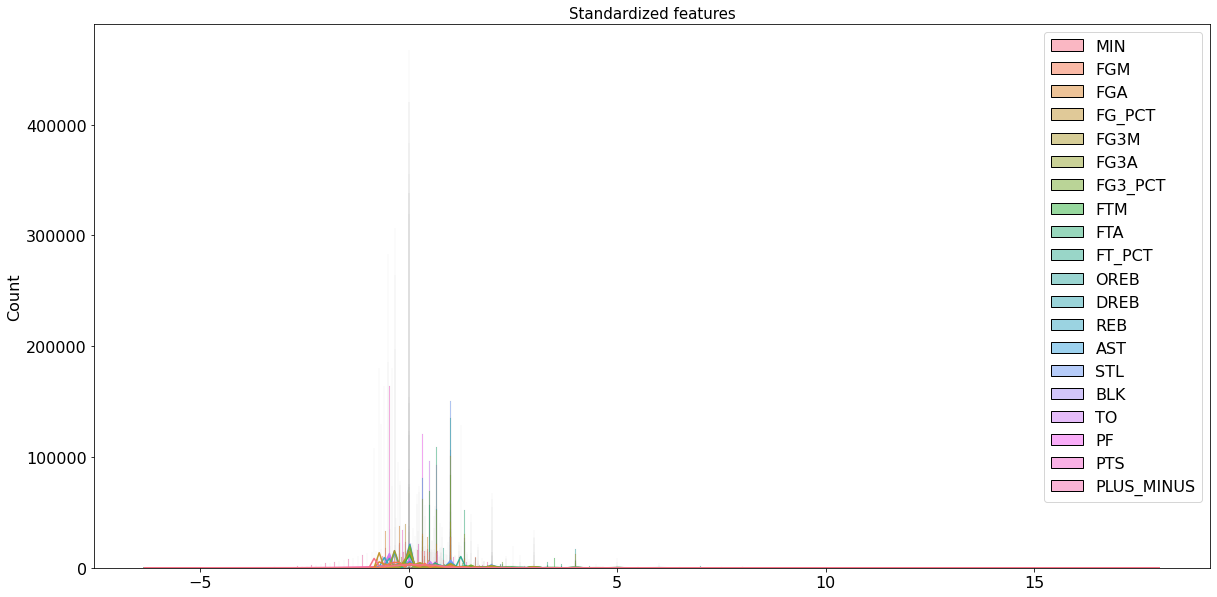

In [47]:
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = '16'
plt.title('Standardized features', fontsize = 15)     
sns.histplot(nba_RobustScaler[features], kde =True)

Se puede observar como al tener una normalizacion basada en los percentiles, el rango de resultados es mayor en longitud pero se mantiene una distribucion similar a los datos originales.